In [4]:
import fastf1 as ff1
import pandas as pd
import sys
import os
sys.path.append(os.path.dirname("/home/ben/Individual_Project/DB"))
from DB.models import Circuit, RacingWeekend, Driver, Session, SessionResult, init_db
from database_operations import DatabaseOperations
from race_data import RaceDataSetup
from race_dataframe import RaceDataframe


In [5]:
db = DatabaseOperations(2024, "Sakhir")
race_dataframe = RaceDataframe(db)
race_setup = RaceDataSetup(db, race_dataframe)

/home/ben/Individual_Project/Laptime Calc graph/race_dataframe.py:98: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  race_df["next_pit"] = race_df["next_pit"].fillna(False)


In [6]:
race_df = race_setup.get_driver_tyre_coefficients()

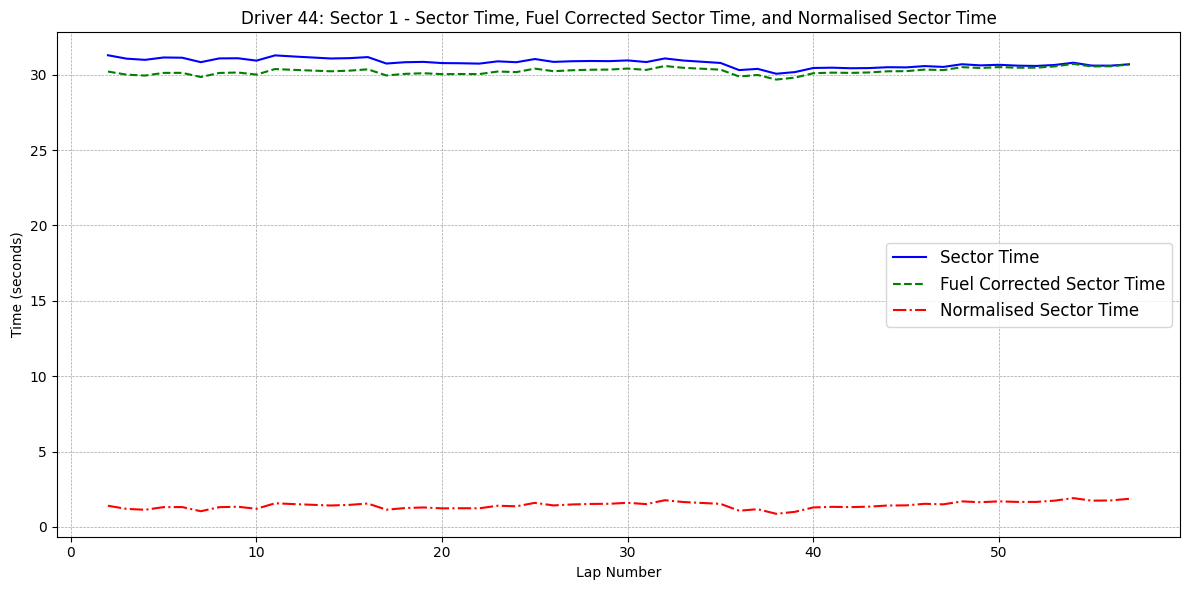

In [7]:
import matplotlib.pyplot as plt

# Filter data for driver number 44 and sector 1
driver_44_sector1_data = race_df[(race_df["driver_number"] == 44) & (race_df["sector"] == 1)]

# Extract relevant columns
lap_nums = driver_44_sector1_data["lap_num"]
sector_times = driver_44_sector1_data["sector_time"]
fuel_corrected_sector_times = driver_44_sector1_data["fuel_corrected_sector_time"]
normalised_sector_times = driver_44_sector1_data["normalised_sector_time"]

# Create the plot
plt.figure(figsize=(12, 6))

# Plot sector time
plt.plot(
    lap_nums,
    sector_times,
    label="Sector Time",
    color="blue",
    linestyle="-",
)

# Plot fuel-corrected sector time
plt.plot(
    lap_nums,
    fuel_corrected_sector_times,
    label="Fuel Corrected Sector Time",
    color="green",
    linestyle="--",
)

plt.plot(
    lap_nums,
    normalised_sector_times,
    label="Normalised Sector Time",
    color="red",
    linestyle="-.",
)

# Add labels and title
plt.title("Driver 44: Sector 1 - Sector Time, Fuel Corrected Sector Time, and Normalised Sector Time")
plt.xlabel("Lap Number")
plt.ylabel("Time (seconds)")
plt.legend(fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()